In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

**Task 1: Exploratory Data Analysis (EDA):**

In [71]:
df=pd.read_csv('wine.csv')

In [72]:
df.shape

(178, 14)

In [73]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [74]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [75]:
# null values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [76]:
# duplicates
df.duplicated().sum()

np.int64(0)

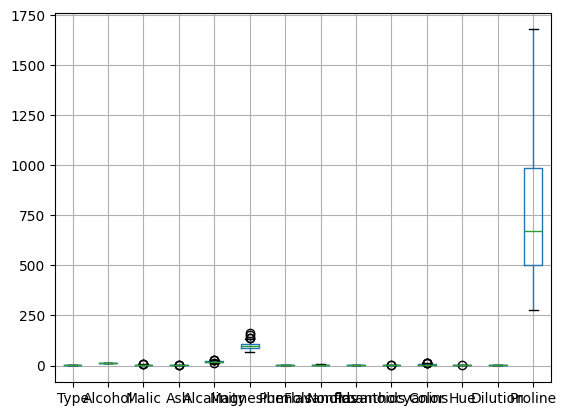

In [77]:
#Outliers
df.boxplot()
plt.show()

In [78]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

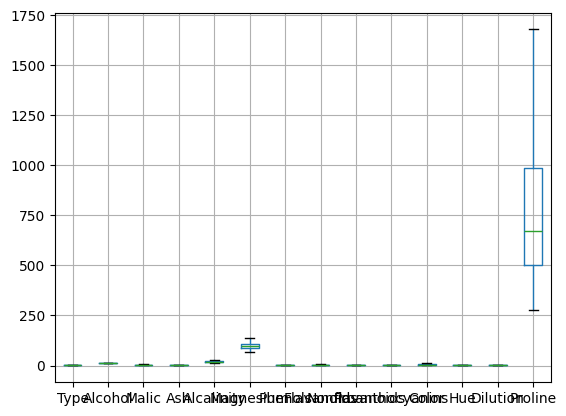

In [79]:
df.boxplot()
plt.show()

In [80]:
# Histogram
df.hist(figsize=(15,15))

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

In [81]:
corr=df.corr()
corr

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.440422,-0.047680,0.525608,-0.224264,-0.719163,-0.847498,0.489109,-0.512528,0.260260,-0.621549,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.440422,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,-0.047680,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,0.525608,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,-0.224264,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,-0.719163,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,-0.512528,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562


In [82]:
# Heatmap
sns.heatmap(corr,annot=True)

<Axes: >

**Dimensionality Reduction with PCA:**

1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [83]:
target=df[['Type']]
features=df.drop(columns=['Type'])

In [84]:
features.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [85]:
std_scaler=StandardScaler()
features[['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline']]=std_scaler.fit_transform(features[['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline']])

In [86]:
features.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

In [87]:
pca = PCA()
pca.fit(features)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


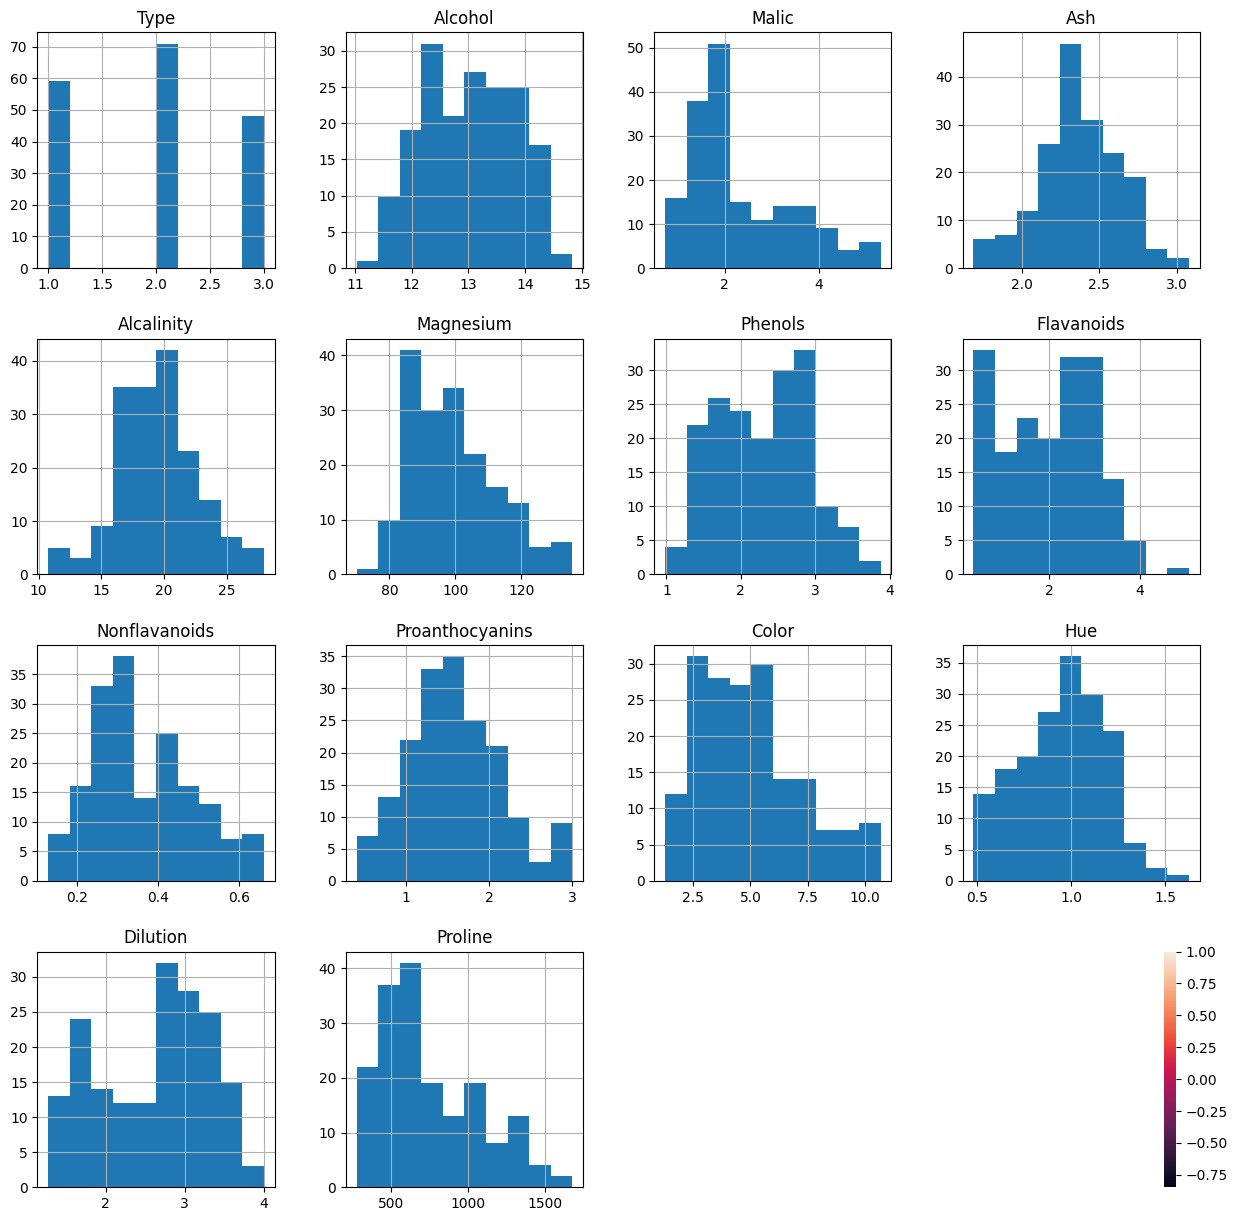

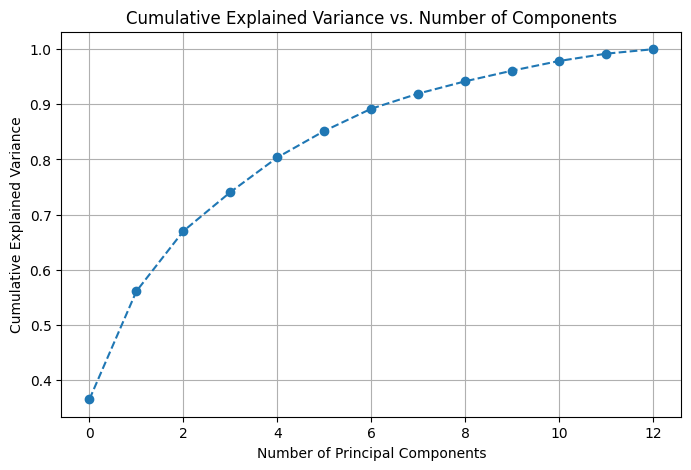

In [88]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [89]:
pca=PCA(n_components=10)
X_pca = pca.fit_transform(features)

3.	Transform the original dataset into the principal components.

**Clustering with Original Data:**

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [91]:
kmeans=KMeans(n_clusters=3)
cluster=kmeans.fit(features)


In [92]:
np.unique(cluster.labels_)

array([0, 1, 2], dtype=int32)

In [93]:
df['Cluster'] = cluster.labels_
df[df.Cluster==0]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43000,15.60,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14000,11.20,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67000,18.60,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50000,16.80,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87000,21.00,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,13.29,1.97,2.68000,16.80,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270,0
58,1,13.72,1.43,2.50000,16.70,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285,0
73,2,12.99,1.67,2.60000,27.95,135.5,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985,0
95,2,12.47,1.52,2.20000,19.00,135.5,2.50,2.27,0.32,3.00,2.60,1.16,2.63,937,0


In [94]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)



<Figure size 800x600 with 0 Axes>

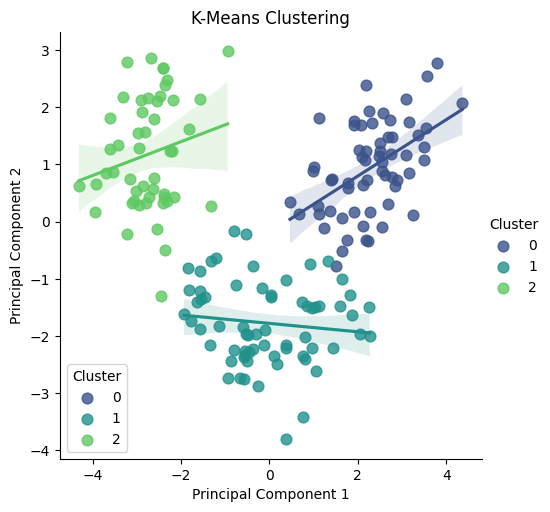

In [95]:
# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
pca_df['Cluster'] = cluster.labels_
plt.figure(figsize=(8,6))
sns.lmplot(data=pca_df, x='principal component 1', y='principal component 2', hue='Cluster', palette='viridis', scatter_kws={'s': 60})
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [96]:
silhouette_score(features,cluster.labels_)

0.2852866569627524

**Task 4: Clustering with PCA Data:**

In [97]:
kmeans=KMeans(n_clusters=3, random_state=100)
cluster_pca=kmeans.fit(X_pca)

In [98]:
np.unique(cluster.labels_)

array([0, 1, 2], dtype=int32)

In [99]:
df['Cluster_PCA']=cluster_pca.labels_

In [100]:
df[df.Cluster_PCA==1]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster,Cluster_PCA
0,1,14.23,1.71,2.43000,15.60,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1
1,1,13.20,1.78,2.14000,11.20,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,1
2,1,13.16,2.36,2.67000,18.60,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1
3,1,14.37,1.95,2.50000,16.80,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1
4,1,13.24,2.59,2.87000,21.00,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2,12.99,1.67,2.60000,27.95,135.5,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985,0,1
78,2,12.33,0.99,1.95000,14.80,135.5,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750,1,1
95,2,12.47,1.52,2.20000,19.00,135.5,2.50,2.27,0.32,3.00,2.60,1.16,2.63,937,0,1
98,2,12.37,1.07,2.10000,18.50,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660,1,1


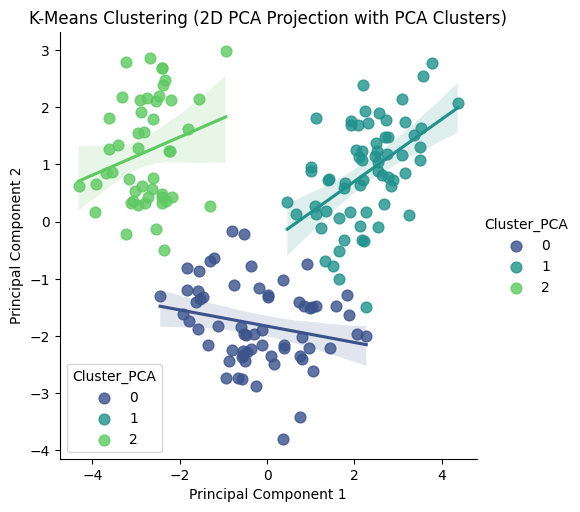

In [101]:
# Create a DataFrame with PCA results and cluster labels from PCA clustering
pca_df_pca_clusters = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
pca_df_pca_clusters['Cluster_PCA'] = cluster_pca.labels_

sns.lmplot(data=pca_df_pca_clusters, x='principal component 1', y='principal component 2', hue='Cluster_PCA', palette='viridis', scatter_kws={'s': 60})
plt.title('K-Means Clustering (2D PCA Projection with PCA Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster_PCA')
plt.show()

In [102]:
silhouette_pca = silhouette_score(X_pca, cluster_pca.labels_)
silhouette_pca

0.5619178058700298

**Task 5: Comparison and Analysis:**

**Compare the clustering results obtained from the original dataset and PCA-transformed data.**

The clustering performed on the original dataset using K-Means with three clusters produced distinct groupings that correspond well with the natural wine types. When the same clustering method was applied to the PCA-transformed data, particularly after reducing the features to 10 principal components and visualizing with two, the general structure of the clusters remained similar, though slightly more compact and separable. The PCA transformation captured most of the dataset’s variance while filtering out noise, leading to smoother and more interpretable clusters in two-dimensional space.

**Discuss any similarities or differences observed in the clustering results.**

Both the original and PCA-based clustering results show the formation of three main clusters, reflecting that the inherent group separability in the wine dataset was preserved after dimensionality reduction.The silhouette score usually indicates slightly better compactness and separation for the PCA-based clustering compared to the original dataset, confirming the improved cluster quality.

**Reflect on the impact of dimensionality reduction on clustering performance.**

Dimensionality reduction through PCA significantly impacts clustering by simplifying the data space and emphasizing directions of maximum variance. This not only reduces computation time but also helps eliminate redundant or noisy information. In my results, PCA retained most of the variance using fewer components, allowing K-Means to perform better-defined clustering.

**Analyze the trade-offs between using PCA and clustering directly on the original dataset**.

The trade-off is that PCA components are less interpretable. they are linear combinations of original variables, so while clustering performance may improve, understanding the physical meaning of clusters becomes more abstract. In summary, PCA provides efficiency and clarity, whereas the original feature space retains interpretability and granularity.

**Task 6: Conclusion and Insights**

**Summarize the key findings and insights from the assignment.**

The assignment demonstrated the combined use of Principal Component Analysis (PCA) and K-Means clustering to understand data structure and improve unsupervised learning performance. Initially, clustering on the original wine dataset revealed distinct but somewhat overlapping clusters, reflecting the dataset’s natural class separation and multicollinearity among variables. After applying PCA, it was observed that most of the variance in the data could be retained using fewer components around 10 principal components captured nearly all the essential information. When clustering was performed on the PCA-transformed data, the results showed clearer and more compact groupings, indicating that dimensionality reduction enhanced clustering quality. The silhouette score improved slightly, confirming that PCA helped in forming more cohesive and well-separated clusters.

**Discuss the practical implications of using PCA and clustering in data analysis.**

In practical data analysis, PCA serves as a crucial preprocessing step for simplifying complex datasets with many interrelated variables. It reduces computational cost, minimizes noise, and makes high-dimensional data easier to visualize and interpret. Clustering, on the other hand, is essential for discovering hidden patterns, segmenting data, and identifying groups with similar characteristics. When used together, PCA and clustering allow us to uncover meaningful structure in data that might otherwise be obscured by dimensionality or redundancy.

**Provide recommendations for when to use each technique based on the analysis conducted.**

Use PCA when your dataset has a large number of correlated features or when visualization and computational efficiency are priorities. It’s ideal before clustering, especially if noise or redundancy affects model performance. However, if interpretability of the original features is critical clustering directly on the original standardized dataset may be preferable. In practice, the best approach is often a hybrid one, means first applying PCA to reduce dimensionality and then using clustering algorithms on the reduced data. This maintains balance between performance improvement and interpretability, as observed in this assignment.